# O conjunto de dados

O conjunto de dados utilizado para esta análise foi Dados do Titanic onde encontrasse informações de 891 dos 2.224 passageiros a bordo do navio.

Pode ser encontrado em [Dados do Titanic](https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59e4fe3d_titanic-data-6/titanic-data-6.csv) e suas especificações em [Kaggle](https://www.kaggle.com/c/titanic/data)

# Qual fator mais influênciou a chance de sobrevivência dos passageiros do Titanic

Iremos analisar qual dos fatores encontrados no conjunto de dados mais teve influência na taxa de sobrevivência dos passageiros a bordo do Titanic. Para isso iremos analisar as características mais relevantes como idade, gênero, status, entre outros.

## Importando bibliotecas e o dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

df = pd.read_csv('titanic-data-6.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Antes de começar a explorar e analisar o conjunto de dados, vamos mudar o nome das colunas para letras minusculas e também colocar o 'PassengerId' como index do nosso conjunto de dados.

In [2]:
df.rename(columns=lambda x: x.lower(), inplace=True)
df.set_index('passengerid', inplace=True)
df.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
passengerid,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Explorando o dataset

In [3]:
df.describe(include='all')

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
count,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,"Hassan, Mr. Houssein G N",male,NaN,NaN,NaN,347082,NaN,C23 C25 C27,S
freq,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


Podemos observar que há 891 amostras em nosso conjunto de dados, sendo que há valores faltando nas colunas 'age', 'cabin' e 'embarked'.

In [4]:
df.isnull().sum()[df.isnull().sum() != 0]/df.shape[0]*100

age         19.865320
cabin       77.104377
embarked     0.224467
dtype: float64

Começando pela coluna 'cabin', vamos desconsiderá-la, pois há uma enorme quantidade de dados faltando (77%) e não temos outra coluna que nos ajude a completar estas informações.

In [5]:
df.drop(columns=['cabin'], inplace=True)
df.describe(include='all')

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked
count,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,889
unique,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,3
top,NaN,NaN,"Hassan, Mr. Houssein G N",male,NaN,NaN,NaN,347082,NaN,S
freq,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,644
mean,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN
std,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN
min,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN
25%,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN
50%,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN
75%,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN


Para a coluna 'embarked', vamos fazer uma análise

In [6]:
df['embarked'].value_counts()

S    644
C    168
Q     77
Name: embarked, dtype: int64

Vemos que a grande maioria dos passageiros embarcaram por Southampton, portanto iremos completar os dados que faltam com 'S', pois é uma quantidade minima (apenas dois registros faltando) e isso não afetará nossa análise futura.

In [7]:
df['embarked'].fillna('S', inplace=True)
df.describe(include='all')

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked
count,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,891
unique,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,3
top,NaN,NaN,"Hassan, Mr. Houssein G N",male,NaN,NaN,NaN,347082,NaN,S
freq,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,646
mean,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN
std,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN
min,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN
25%,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN
50%,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN
75%,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN


Agora para a coluna 'age', não podemos completar apenas com a média de todas as idades, pois isso afetaria nossa análise. Portanto, primeiro vamos separar por grupo de idades.

É possível ver que cada passageiro possui um título como 'Mrs.', 'Mr.', então vamos criar uma nova coluna 'title' extraindo o título de cada passageiro por meio de uma Expressão Regular.

In [8]:
df['title'] = df['name'].str.extract('(,\s[\w\s]+\.)', expand=False).apply(lambda x: x.split(', ')[1])
df.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked,title
passengerid,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr.
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs.
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss.
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs.
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr.


Vamos achar a mediana de idade para cada título.

In [9]:
titles = df['title'].unique()
title_age_map = {title: df['age'][df['title'] == title].median() for title in titles}

E agora preencher os campos sem dado com estes novos dados.

In [10]:
df['age'] = df['age'].fillna(df['title'].map(title_age_map))
df.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked,title
passengerid,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr.
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs.
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss.
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs.
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr.


Por último vamos verificar se há algum dado duplicado.

In [11]:
df[df.duplicated() == True].count()

survived    0
pclass      0
name        0
sex         0
age         0
sibsp       0
parch       0
ticket      0
fare        0
embarked    0
title       0
dtype: int64

Com todos os dados devidamente preenchidos e sem nenhuma duplicata, vamos iniciar nossa análise.

## Análise do dataset

### Quantidade de sobreviventes

Text(0.5,1,'Sobreviventes')

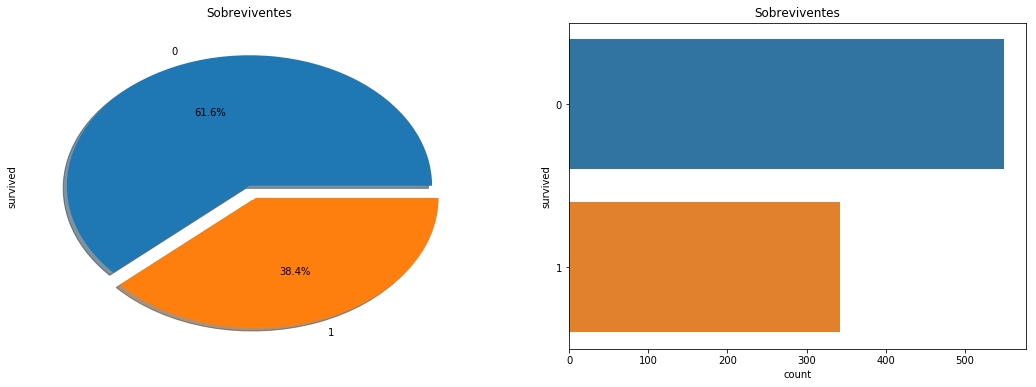

In [33]:
f,axis=plt.subplots(1,2, figsize=(18,6))
df['survived'].value_counts().plot.pie(explode=[0,0.1], ax=axis[0], shadow=True, autopct='%1.1f%%')
axis[0].set_title('Sobreviventes')
sns.countplot(y='survived', data=df, ax=axis[1])
axis[1].set_title('Sobreviventes')

É perceptível que não muitos passageiros sobreviveram.<br>

Dentre os 891 passageiros do conjunto de dados que será analisado mais profundamente, apenas 38,4% sobreviveram.

Nos próximos passos será verificado quais variáveis ajudaram ou não os passageiros a sairem vivos do navio Titanic.

### Pclass

A classe da passagem (ticket class) é um indicador do status socioeconômico. Mostra a riqueza e onde a cabine é encontrada no navio.

Text(0.5,1,'Taxa de sobreviventes X Classe da passagem')

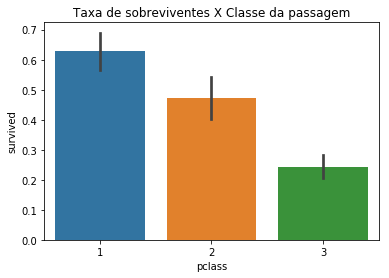

In [12]:
sns.barplot(x='pclass', y='survived', data=df)
plt.title('Taxa de sobreviventes X Classe da passagem')

Como é possível observar, quanto maior a classe, maior a probabilidade de sobrevivência. Provavelmente porque as cabines eram posicionadas mais próximas dos botes salva-vidas.

### Age

A idade indica a idade de cada passageiro.

Text(0.5,1,'Quantidade de sobreviventes X Idade')

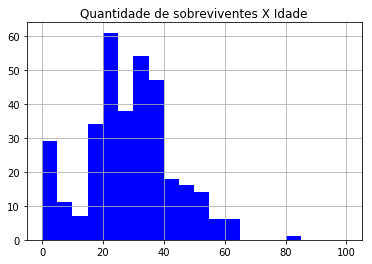

In [13]:
bin_edges = [x for x in range(0, 105, 5)]
df['age'][df['survived'] == 1].hist(bins=bin_edges, color='blue')
plt.title('Quantidade de sobreviventes X Idade')

Text(0.5,1,'Quantidade de mortos X Idade')

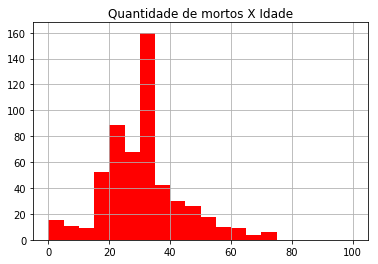

In [14]:
df['age'][df['survived'] == 0].hist(bins=bin_edges, color='red')
plt.title('Quantidade de mortos X Idade')

A diferença entre sobrevivente e não sobreviventes entre o grupo de idades é notável principalmente nos bebês e crianças. Há uma alta taxa de sobrevivência destes dois grupos.
Enquanto que há uma taxa alta de não sobreviência entre os adultos de 30-40 anos.

### Sex

O sexo indica o gênero de cada passageiro

Text(0.5,1,'Taxa de sobreviventes X Gênero')

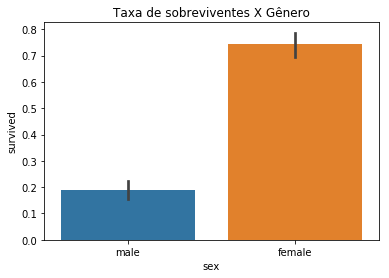

In [15]:
sns.barplot(x='sex', y='survived', data=df)
plt.title('Taxa de sobreviventes X Gênero')

As mulheres tiveram uma taxa muito mais alta de sobreviência do que os homens. Com esta conclusão e a anterior, podemos concluir que a premissa de "mulheres e crianças primeiro" foi seguida.

### Sibsp e Parch

Como os dois são indicadores da quantidade de parentes no navio, iremos somar as duas em outra coluna 'familysize'.

In [16]:
df['familysize'] = df['sibsp'] + df['parch']
df.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked,title,familysize
passengerid,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr.,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs.,1
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss.,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs.,1
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr.,0


Text(0.5,1,'Taxa de sobreviventes X Membros da familia a bordo')

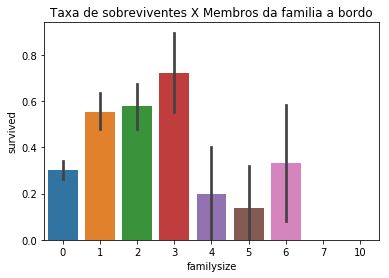

In [17]:
sns.barplot(x='familysize', y='survived', data=df)
plt.title('Taxa de sobreviventes X Membros da familia a bordo')

In [18]:
df['survived'].groupby(df['familysize']).count()

familysize
0     537
1     161
2     102
3      29
4      15
5      22
6      12
7       6
10      7
Name: survived, dtype: int64

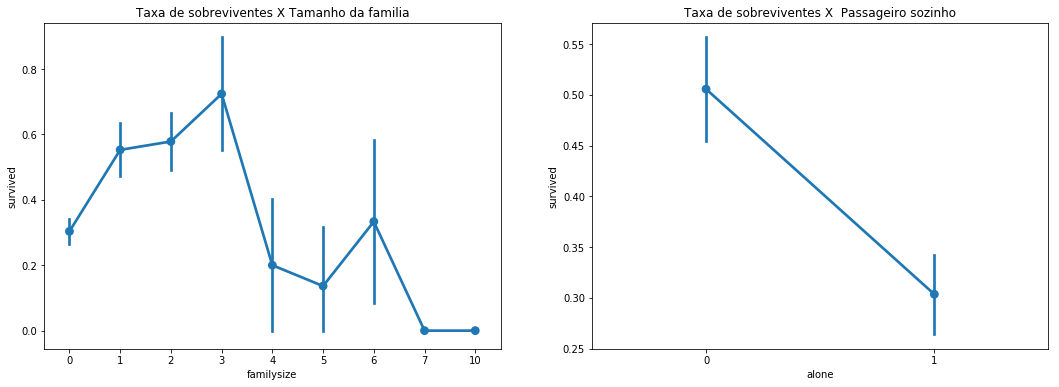

In [21]:
df['alone'] = 0
df.loc[df['familysize'] == 0, 'alone'] = 1

f,axis=plt.subplots(1,2, figsize=(18,6))
sns.factorplot('familysize', 'survived', data=df, ax=axis[0])
axis[0].set_title('Taxa de sobreviventes X Tamanho da familia')
sns.factorplot('alone', 'survived', data=df, ax=axis[1])
axis[1].set_title('Taxa de sobreviventes X  Passageiro sozinho')
plt.close(2)
plt.close(3)

A maioria dos passageiros não tinha nenhum membro da família a bordo e famílias de tamanho médio, entre 1-3 pessoas tiveram uma chance maior de sobrevivência.

Contudo é possível relatar que aqueles com família no navio tiveram uma maior chance de sobreviver.

### Embarked

Esta propriedade diz respeito ao local de embarque do passageiro.

Text(0.5,1,'Taxa de sobreviventes X Local de embarque')

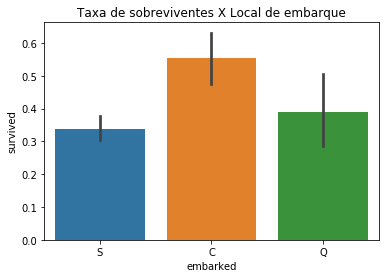

In [83]:
sns.barplot(x='embarked', y='survived', data=df)
plt.title('Taxa de sobreviventes X Local de embarque')

A taxa de sobrevivência para os que embarcaram em Cherbourg (C) foi maior.

Text(0.5,1,'Local de embarque X Classe da passagem')

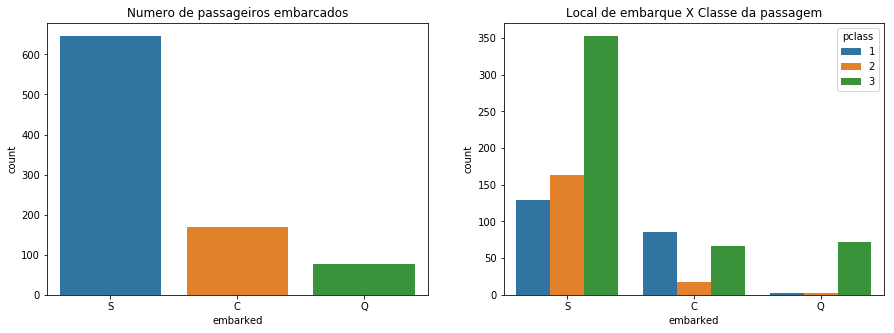

In [20]:
f,axis=plt.subplots(1,2, figsize=(15,5))
sns.countplot('embarked', data=df, ax=axis[0])
axis[0].set_title('Numero de passageiros embarcados')
sns.countplot('embarked', hue='pclass', data=df, ax=axis[1])
axis[1].set_title('Local de embarque X Classe da passagem')

In [79]:
df['embarked'].value_counts()

S    646
C    168
Q     77
Name: embarked, dtype: int64

In [82]:
df[df['embarked'] == 'S']['pclass'].value_counts()

3    353
2    164
1    129
Name: pclass, dtype: int64

Destes dados podemos retirar alguns fatos:<br>
1 - A maioria dos passageiros embarcaram em Southampton (S), porém neste local houve menos sobreviventes. Isso pode ser devido que 54% faz parte da terceira classe (pclass = 3).<br>
2 - Devido a maioria dos passageiros embarcados em C fazerem parte da primeira (pclass = 1), pode explicar o fato que neste local a taxa de sobrevivência foi maior.

## Limpando o dataset

Por fim iremos retirar as colunas 'fare' e 'ticket', pois nenhuma das duas tiveram relevância em nossa análise.

In [27]:
df.drop(columns=['fare', 'ticket'], inplace=True)

# Conclusão

Podemos concluir como resultado que dentre as variáveis analisadas, a mais impactante foi o gênero do passageiro seguida pela idade e logo após a classe (status socioeconômico - pclass).

Dessa premissa, conseguimos tirar algumas possíveis outras:<br>
1 - Mãe e filhos(as) foram salvos juntos;<br>
2 - Havendo somente pai, mãe e um filho a chance torna-se maior;

### Limitações

Encontrou-se como fator limitante que algumas variáveis não possuiam valores para alguns dos passageiros. São elas: Age, Cabin e Embarked. Também não foram encontradas correlação entre a taxa de sobrevivência e as propriedades Ticket e Fare.

<ul>
    Medidas tomadas
    <ul>
        <b>Age</b>: os valores faltantes foram preenchidos de acordo com a idade mediana dos passageiros com mesmo título (Mr., Mrs. Miss., etc).<br>
        <b>Embarked</b>: devido a baixa quantidade de dados faltantes, apenas dois registros, o local de embarque foi preenchido com aquele que teve a maior quantidade.<br>
        <b>Cabin</b>: esta característica foi descartada do dataset devido a grande quantidade de dados faltantes e a impossibilidade de preenche-los baseando-se em outras características.<br>
        <b>Ticket e Fare</b>: as duas propriedades foram retiradas, pois não foi utilizada na fase de análise.
    </ul>
</ul>